# Exam 1 Conceptual Study Guide

Midterm 1 is on March 5 in MEZ 1.306, 3:30-5pm

> No Calculator

> Closed notes, except for one hand-written cheat sheet 8.5"x11"  (2-sided)

> Covers everything through Lecture 9 (Ch. 1 and Ch. 2.1-2.3)

> Covers everything through HW4. Anything on HW is fair game

## Chapter 1: Signals and Systems
We will deal with two kinds of signals: **discrete time** and **continuous time**. 

### 1.2.1 Transformations of the Independent Variable
We will see three kinds of signal transformations in this section: 
- Time Shifting
- Time Reversal
- Time Scaling

When transforming signals, remeber to combine them in the order:
1. shift
2. flip
3. scale

**Time Shift**: transformation of the independent variable by displacing or shifting a signal. 

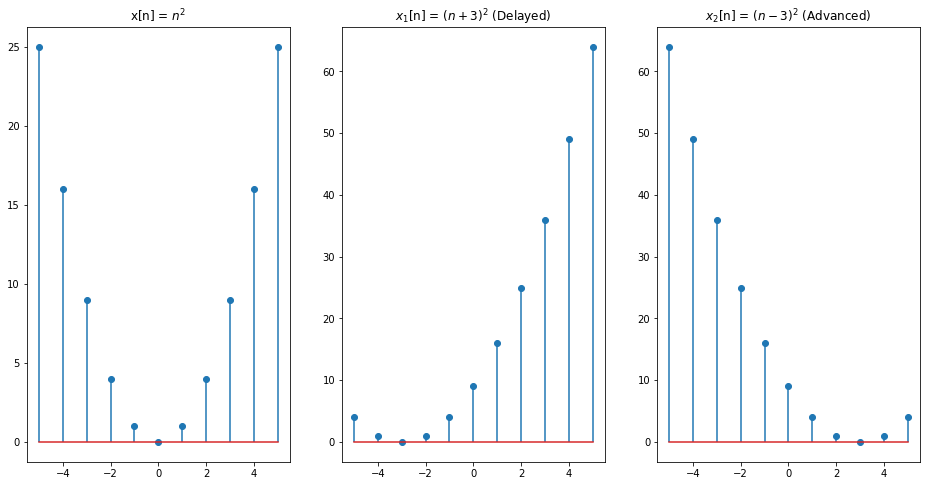

In [136]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
n = np.array(range(-5,6))
x = n**2
plt.stem(n,x, use_line_collection=True)
plt.title("x[n] = $n^2$")

plt.subplot(1,3,2)
x1 = (n+3)**2
plt.stem(n,x1, use_line_collection=True)
plt.title("$x_1$[n] = $(n+3)^2$ (Delayed)")

plt.subplot(1,3,3)
x2 = (n-3)**2
plt.stem(n,x2, use_line_collection=True)
plt.title("$x_2$[n] = $(n-3)^2$ (Advanced)")
plt.show()

$x[n], x[n-n_0]$ are identical in shape, but the signal is *delayed* or *advanced* by the amount n. 
- Delayed: $n_0 > 0$
- Advanced: $n_0 < 0$

**Time Reversal**: the signal x(-t) is obtained through the reflection of x(t) about $n=0$ (y-axis).

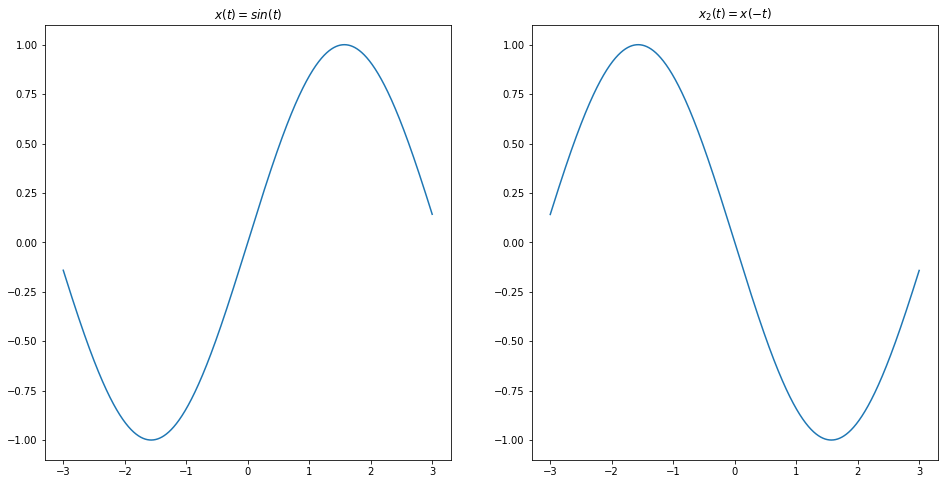

In [137]:
%matplotlib inline
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
t = np.arange(-3, 3, 0.001)
x = np.sin(t)
plt.plot(t,x)
plt.title("$x(t)=sin(t)$")

plt.subplot(1,2,2)
x2 = np.sin(-t)
plt.plot(t,x2)
plt.title("$x_2(t) = x(-t)$")
plt.show()

We can clearly see that the signal $x_2(t)$ is the same as the signal $x(t)$ reflected about the line t=0.

**Time Scaling**: linear scale changes of the independent variable, or the multiplication of the independent variable by a *scalar*.


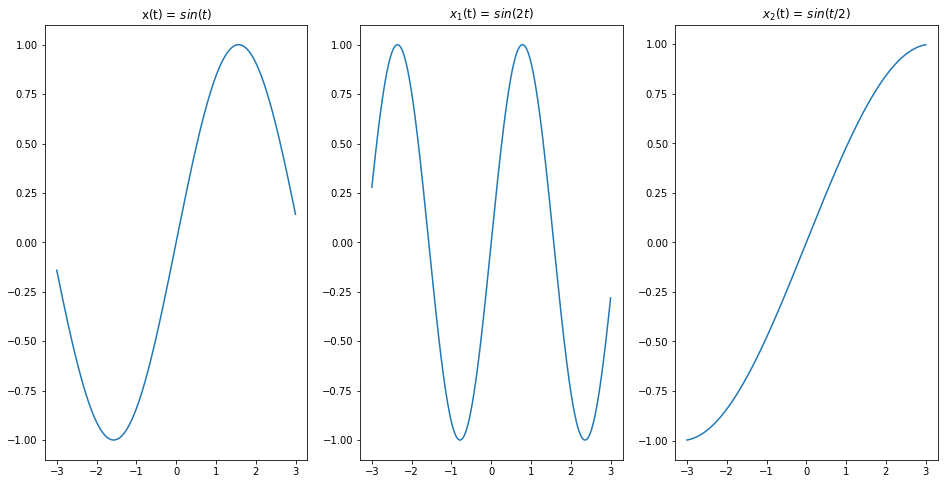

In [138]:
plt.figure(figsize=(16,8))
plt.subplot(1,3,1)
t = np.arange(-3, 3, 0.001)
def fun(t):
    return np.sin(t)
g = fun(t)
plt.plot(t,g)
plt.title("x(t) = $sin(t)$")

plt.subplot(1,3,2)
g1 = fun(2*t)
plt.plot(t,g1)
plt.title("$x_1$(t) = $sin(2t)$")

plt.subplot(1,3,3)
g2 = fun(0.5*t)
plt.plot(t,g2)
plt.title("$x_2$(t) = $sin(t/2)$")
plt.show()

An easy way to think about time scaling is to imagine the signal x(t) as a song. If the signal $x_2(t) = x(2t)$, then it is like the song is sped up to play twice as fast. A time scaled signal is being compressed by the scaling factor.
- Upsampling (Interpolation): x(t) -> n -> x(n*t), t<1 
- Downsampling: x(t) -> n -> x(n*t), t>1

**Note:** In discrete time, downsampling causes *infomation loss*. You cannot recover the original discrete signal from the downsampled transformation (a.k.a. non-invertible). This will be comvered more in System Properties. 

### 1.2.2 Periodic Signals
Periodic Signals are a special class which have the property that there is some positive value of T for which
$x(t) = x(t + T)$
for *all* values of T. 

In other words, the signal would be unchanged by a time shift of T.

The *fundamental period $T_0$* is the smallest positive value of T for which this equation is true. 


---

Ex: Find the fundamental period of the signal: $$x[n] = \cos(\frac{\pi*n}{18}) + \sin(\frac{10\pi*n}{24})$$

> Frequency Standard Form: $2\pi F_0n$

1: $ \frac{n\pi}{18} = 2\pi F_0n$ (finding period of cosine component)

2: $F_0 = \frac{1}{36} \therefore N_0 = 36 $ (F: frequency, N = period)

3: $ \frac{10n\pi}{24} = 2\pi F_0n$ (finding period of sine component)

4: $F_1 = \frac{5}{24} \therefore N_1 = \frac{24}{5}$ (F: frequency, N = period)

5: Find the Least Common Multiple of $N_0, N_1$

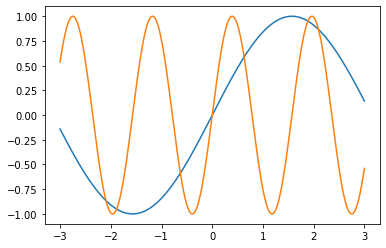

In [139]:
t = np.arange(-3, 3, 0.001)
si = np.sin(t)
s2 = np.sin(4*t)
plt.plot(t,si)
plt.plot(t,s2)
plt.show()

### 1.2.3 Even and Odd Signals
Any signal can be broken into the sum of two signals, one of which is even and the other which is odd. 

**Even**: a signal x(t) or x[n] is considered even if it is identical to its time-reversed counterpart, i.e. with its reflection about the origin: $x(-t) = x(t)$ or $x[-n] = x[n]$

Even component of a signal: $Ev\{x(t)\} = \frac{1}{2}\mid x(t) + x(-t)\mid $

**Odd**: an odd signal is equal to its counterpart flipped over both axis. By necessity, the signal must be zero at t = 0 or n = 0. $$x(-t) = -x(t)$$ $$x[-n] = -x[n] $$

Odd component of a signal: $Od\{x(t)\} = \frac{1}{2}\mid x(t) - x(-t)\mid $

## 1.3 Exponential and Sinusoidal Signals

--- 

### 1.3.1 Continuous-Time Complex Exponential and Sinusoidal Signals
The continuous time *complex exponential signal* is of the form:
$$x(t) = Ce^{\alpha t} $$
Depending on the values of $C, \alpha$, these exponentials exhibit different behavior.

**Real Exponential Signals**
If both $C$ and $\alpha$ are real, x(t) is called a real exponential. These exhibit two types of behavior.
- $\alpha$ > 0: growing exponential
- $\alpha$ < 0: decaying exponential

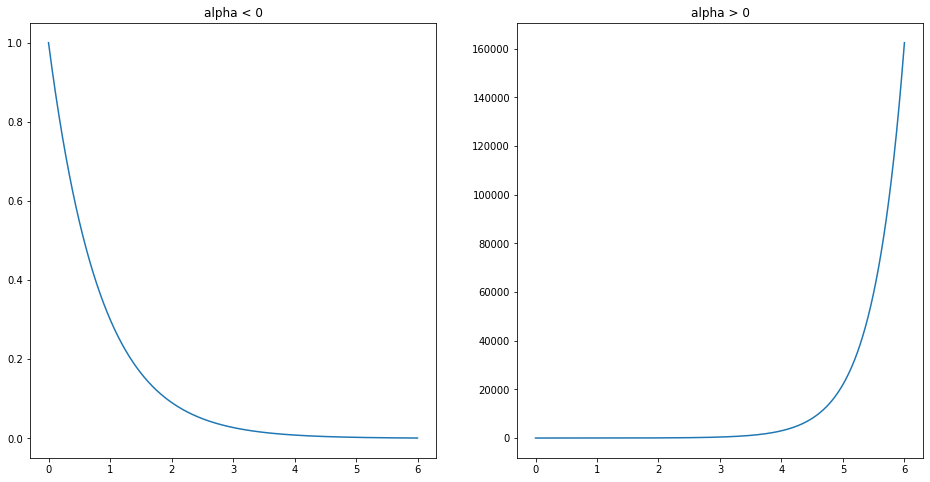

In [140]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
c = 5 # the scalar constant of our exponential
t = np.arange(0, 6, 0.001)
a1 = -1.2
x1 = np.exp(a1*t)
plt.plot(t,x1)
plt.title("alpha < 0")

plt.subplot(1,2,2)
a2 = 2
x2 = np.exp(a2*t)
plt.plot(t,x2)
plt.title("alpha > 0")
plt.show()

**Periodic Complex Exponential and Sinusoidal Signals**
A second class is obtained by contraining $\alpha$ to be purely imaginary, specifically: 
$$x(t) = e^{j\omega_0t}  \therefore \alpha = j\omega_0$$
To remain periodic, we know that $e^{j\omega_0t} = e^{j\omega_0(t + T)} = e^{j\omega_0t}e^{j\omega_0T}$ 
It follows that for periodicity, we must have $e^{j\omega_0T} = 1$.

If $\omega_0 = 0$, then the signal is periodic for any T. If $\omega_0 \neq 0$, then the smallest positive T is
$$ T_0 = \frac{2\pi}{\mid \omega_0 \mid} $$
From this it is intuitive that $e^{j\omega_0T}$ and $e^{-j\omega_0T}$ have the same fundamental period. 

**General Complex Exponential Signals**
The most general case of a complex exponential can be expressed in terms of both the real exponential and the periodic complex exponential**. Specifically, a complex exponential where $Ce^{\alpha t}$ where C is in polar form and $\alpha$ is in rectangular form. That is: 
$$ C = \mid C \mid e^{j\theta} , \alpha = r + j\omega_0$$
In which case, 
$$ Ce^{\alpha t} = \mid C \mid e^{j\theta}e^{(r + j\omega_0)t} $$

Sinusoids multiplied by a decaying exponential are commonly called *damped sinusoidals*. 


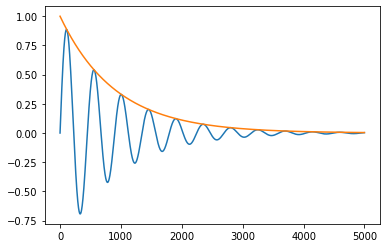

In [141]:
t = np.arange(0, 5, 0.001)
sinu = np.sin(14*t)
decay = np.exp(-1.1*t)
damp = sinu * decay
plt.plot(damp)
plt.plot(decay)

### 1.3.2 Discrete-Time Complex Exponential and Sinusoidal Signals
Mostly the exact same as CT but evaluated discretely
TODO

### 1.3.3 Periodicity Properties of Discrete-Time Complex Exponentials
There are a number of important differences between out DT and CT signals. One of these concerns the complex exponential signal:
$$e^{j \omega_0 \pi t} $$

In continuous time, there are two key properties: 
1. the larger the magnitude of $ \omega_0 $, the higher is the rate of oscilation in the signal
2. $ e^{j \omega_0 \pi t} $ is periodic for any value of $ \omega_0 $

However, in Discrete Time, these are slightly different. 
1. The exponential at frequency $ \omega_0 + 2\pi$ is the same as that at frequency $\omega_0 $
2. The signal $ e^{j \omega_0 n} $ is periodic only if $ \frac{\omega_0}{2\pi} $ is a rational number. The fundamental period of this signal can be written as $ N = m(\frac{2 \pi}{\omega_0}) $

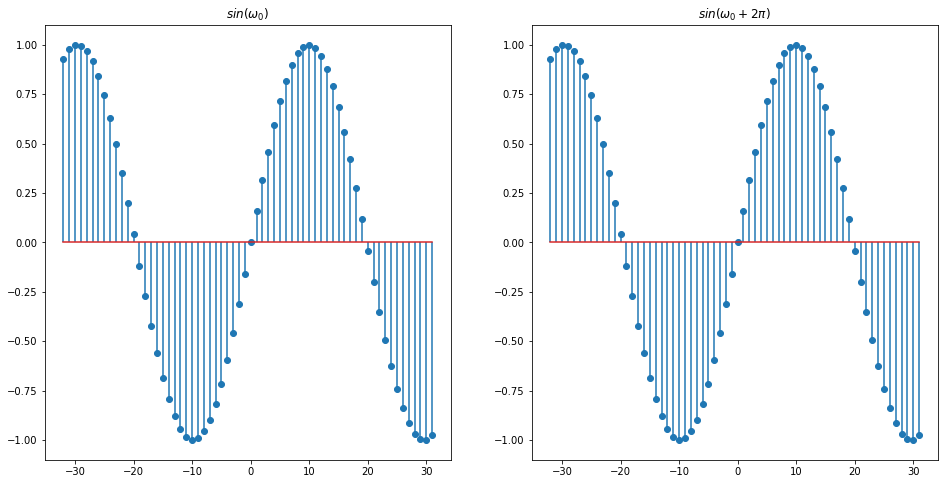

In [148]:
plt.figure(figsize=(16,8))
n = np.array(range(-32,32))
w = np.sin(n/(2*np.pi)) # omega = 1
w2 = np.sin(n/(2*np.pi) + 2*np.pi) # omega + 2pi
plt.subplot(1,2,1)
plt.title("$sin(\omega_0)$")
plt.stem(n, w, use_line_collection=True)

plt.subplot(1,2,2)
plt.title("$sin(\omega_0 + 2\pi)$")
plt.stem(n, w2, use_line_collection=True)
plt.show()

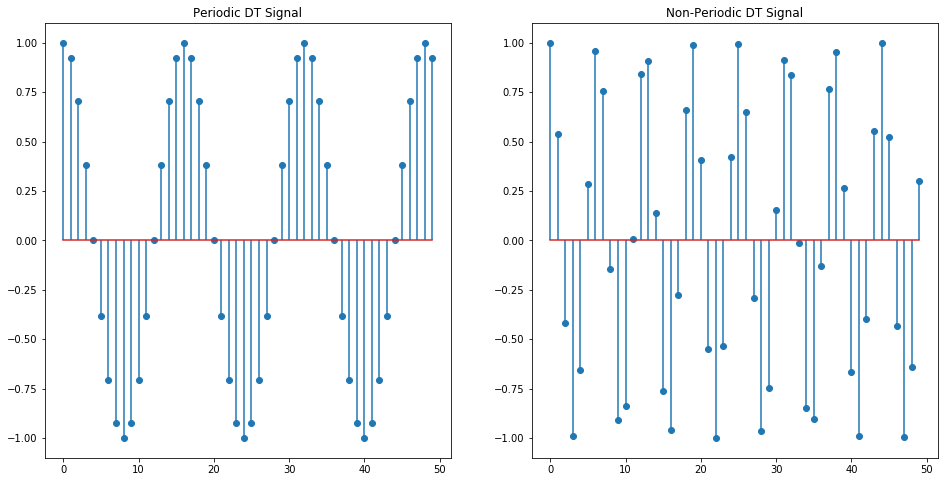

In [158]:
plt.figure(figsize=(16,8))
n = np.array(range(0,50))
N = 2
w = np.pi/8
w2 = 1
# To be periodic, w/(2*pi) and is not periodic otherwise
per = np.exp(1j*w*(n))
nonper = np.exp(1j*w2*(n))

plt.subplot(1,2,1)
plt.title("Periodic DT Signal")
plt.stem(per, use_line_collection=True)

plt.subplot(1,2,2)
plt.title("Non-Periodic DT Signal")
plt.stem(nonper, use_line_collection=True)
plt.show()

## 1.4 The Unit Impulse and the Unit Step Function
Unit Impulse: $$ \sigma[n] = 
\begin{cases} 
   0 & n\neq 0 \\
   1 & n = 0 
\end{cases}$$

Unit Step: $$ u[n] =
\begin{cases} 
   0 & n\lt 0 \\
   1 & n \ge 0 
\end{cases} $$
These two functions are closely inter-related in both Continuous and Discrete Time. 

---

### 1.4.1 Discrete Time Unit Impulse and Unit Step
In discrete time, the unit impulse is the *first difference* of the discrete-time step
$$\sigma[n] = u[n] - u[n-1]$$
Conversely, the unit step is the *running sum* of the unit sample, which is
$$ u[n] = \sum\limits_{k=0}^\infty\delta[n-k] $$

### 1.4.2 Continuous Time Unit Impulse and Unit Step
In CT, the unit step function u(t) is definied similarly to its DT counterpart: 
$$ u(t) =
\begin{cases} 
   0 & n\lt 0 \\
   1 & n \gt 0 
\end{cases}$$
The unit impulse function in CT is not formally differentiable, as it is discontinuous at t = 0. However, we can approximate u(t) as a a function which rises from the value 0 to 1 in a short time period $\Delta$ after t=0.
We then consider the unit impulse to be  the derivative of this idealized function $u_\Delta(t)$ as:
$$\delta(t) = \frac{d}{dt}u_\Delta(t) $$
This impulse has an area of 1, so the height approaches infinity as the time period of change $\Delta$ approaches zero. 


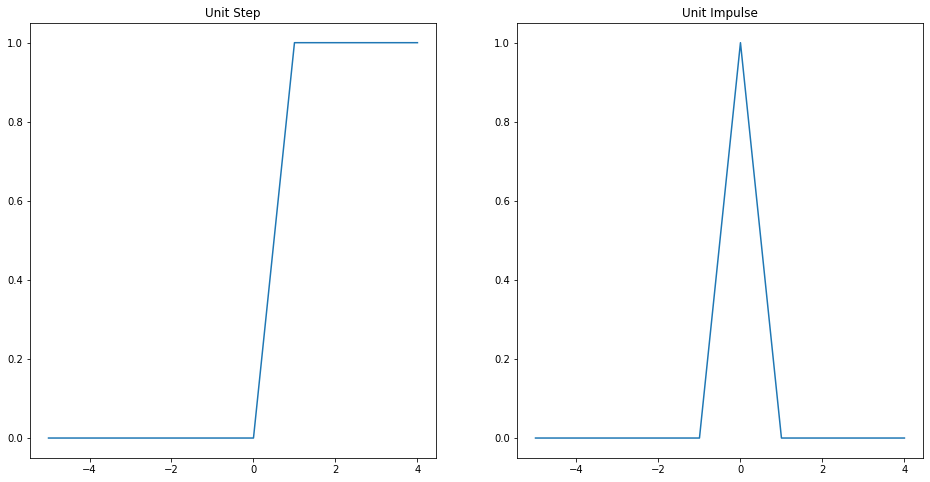

In [144]:
plt.figure(figsize=(16,8))
t = np.array(range(-5,5))
u = np.piecewise(t, [t < 0, t > 0], [0, 1])
r1 = 0
d = np.piecewise(t, [(t<-1/2), (t>-1/2), (t>1/2)], [0, 1, 0])

plt.subplot(1,2,1)
plt.title("Unit Step")
plt.plot(t,u)

plt.subplot(1,2,2)
plt.title("Unit Impulse")
plt.plot(t,d)
plt.show()

This section in the book feels both lacking and confusing. A better description of both of these functions comes from Wolfram Mathworld: 

[Dirac Delta Function](http://mathworld.wolfram.com/DeltaFunction.html)

[Unit Step Function](http://mathworld.wolfram.com/HeavisideStepFunction.html)

They both take some time to load but are great for visualizing how the estimated functions came to be in CT. 

## 1.6 Basic System Properties
**Memory**: a system is said to be *memoryless* if it only depends on the current input value. 

Example of a memoryless system: $ y[n] = (2x[n] - x^{2}[n])^{2} $

Example of a system with memory: $ y[n] = x[n-1] $ (Delay system)

---
    
**Invertibility**: a system is invertible if disctinct inputs lead to distinct outputs. In other words, each output can only be mapped back to a single input. 

Example of invertible system: $ y(t) = 2x(t) $ for which the inverse system is $ w(t) = \frac{1}{2}y(t) $
    
Example of non-invertible system: $ y(t) = x^{2}(t) $, which can be proven to be non-invertible as $y(-2) = y(2) $

--- 

**Causality**: a system is causal if the output at any time depends only on the values of the input at the present time and in the past. Also known as *nonanticipative*. **All memoryless systems are causal.**

---

**Stability**: Informally, a stable system is one in which small outputs lead to responses that do not diverge. BIBO: Bounded input, bounded output. If the output is bounded when the input is bounded. 

Example of stable system: $ y(t) = 2cos(\omega_c t)x(t) $

Example of non-stable system: $ y[n] = \sum\limits_{k=-\infty}^n x[k] $

--- 

**Time-Invariance**: the behavior of the system does not change with time. A system is time-invariant if a time shift in the input signal results in an identical time shift in the output signal. 

Example of time-invariant system: $ y(t) = x(t)cost(\omega_c t) $

Example of time variant system: $ y(t) = 3t\cdot(t-3) $

--- 

**Linearity**: A linear system is one that posesses the property of *superposition*, meaning that if the input consists of the weighted sum of several signals, the output is the weighted sum of the responses of the system to each of those signals. A system is linear if: 
1. The response to $x_1(t) + x_2(t)$ is $y_1(t) + y_2(t)$     (Additive Property)
2. The response to $ax_1(t)$ is $ay_1(t)$     (Scaling or Homogeneity Property)

This definition holds for both continuous and discrete time. A consequence of the superposition property is that, for linear systems, an input which is zero for all times yields an output that is zero for all times. 

Example of a linear system: $ y(t) = tx(t) $

Example of a non-linear system: $ y(t) = x^{2}(t) $

---

**End of Chapter 1**
> Practice Problems for Ch 1 can be found starting on page 57 in the book, or 83 in the pdf